In [128]:
import random
import statistics 
import math
import matplotlib.pyplot as plt

In [129]:
crewmateWin = 0.70
imposterWin = 1 - crewmateWin

secondStageCrewmateWin = 0.8
secondStageImposterWin = 1 - secondStageCrewmateWin

In [139]:
win = False
loss = []
gameAttribs = []

# Loop to adjust points distribtion
# The goal is to find the optimal amount of points to be added to the winning team 
for nn in range(40, 70):
    
    avgGamesToWin = []
    avgAmountOfWinners = []
    
    crewmateWinPoints = 1 + ((nn * 0.25) / 5)
    imposterWinPoints = crewmateWinPoints + 0.5
    secondStageCrewmateWinPoints = crewmateWinPoints - 1
    secondStageImposterWinPoints = secondStageCrewmateWinPoints + 2
    
    
    print('\n' + str(nn) + '---------------------------------------------------')
    print('Crewmate Win Points:', crewmateWinPoints, '\nImposter Win Points:', imposterWinPoints, '\nSecondStage Crewmate Win Points:', secondStageCrewmateWinPoints, '\nSecondStage Imposter Win Points:', secondStageImposterWinPoints)
    
    
    # 1000 simulations of the games based on the point rules defined above 
    for x in range(1000):

        players = [['Faizan', 0, 0],
                   ['Jill', 0, 0],
                   ['Vince', 0, 0],
                   ['Roshni', 0, 0],
                   ['Nicole', 0, 0],
                   ['DeJonte', 0, 0],
                   ['Isaac', 0, 0],
                   ['Derick', 0, 0],
                   ['Kazi', 0, 0],
                   ['Shareefa', 0, 0]]

        if win == True:
            win = False

        nextStage = False

        games = 0
        playersTo10 = 0
        numImposters = 2
        crewmateWin = 0.70

        playersPassed10 = []

        while win == False:

            imposters = []
            crewmates = []
            
            # Select either 2 or 1 imposters 
            imposters = random.sample(players, numImposters)

            for y in range(10):

                if players[y] not in imposters and players[y][2] != 1:
                    
                    # Store all the crewmates in a list
                    crewmates.append(players[y])


            # Generate a random number to determine if either the crewmates or imposters win 
            chancesOfWinning = random.random() 

            #print('\nCrewmates', crewmates)
            #print('\nImposters', imposters)

            
            # If the crewmates Win
            if crewmateWin > chancesOfWinning:

                for z in range(len(crewmates)):

                    players[players.index(crewmates[z])][1] += crewmateWinPoints

                #print('\nCrewmate Win')

                
            # If the imposters win
            else:

                for i in range(len(imposters)):

                    players[players.index(imposters[i])][1] += imposterWinPoints

                #print('\nImposter Win')


            # If there are less than 2 people with 10+ points 
            if nextStage == False:

                for f in range(len(players)):

                    if players[f][1] >= 10 and players[f][0] not in playersPassed10:

                        playersTo10 += 1
                        players[f][2] = 1 
                        playersPassed10.append(players[f][0])

                        if playersTo10 == 2:

                            nextStage = True
                            numImposters = 1
                            crewmateWin = secondStageCrewmateWin
                            crewmateWinPoints = secondStageCrewmateWinPoints
                            imposterWinPoints = secondStageImposterWinPoints

                            '''
                            print('\n', x + 1)
                            print('Games to Win', games)
                            print('First Two Winners:', playersPassed10)
                            print('\n', players)
                            '''
                            
                            break


            
            # Count how many players have 10+ points
            # End the game if there are 5+ players with 10+ points 
            
            playersTo10 = 0

            for g in range(len(players)):

                 if players[g][1] >= 10:

                    playersTo10 += 1

                    if players[g][0] not in playersPassed10:
                        playersPassed10.append(players[g][0])

                    if playersTo10 == 5:

                        win = True

                        '''
                        print('\n', x + 1)
                        print('***Game Over', games)
                        print('Winners:', playersPassed10)
                        print('\n',players)
                        '''

                        avgGamesToWin.append(games)
                        avgAmountOfWinners.append(len(playersPassed10))

                        break


            games += 1



    avgLoss = abs(5 - sum(avgGamesToWin) / len(avgGamesToWin))
    stdevLoss = statistics.stdev(avgGamesToWin)
    avgPlayerAdvLoss = abs(5 - sum(avgAmountOfWinners) / len(avgAmountOfWinners))
    
    # Defining a loss function to find the optimal points distribution 
    totalLoss = avgLoss + stdevLoss + avgPlayerAdvLoss
    loss.append(totalLoss)
    gameAttribs.append([crewmateWinPoints + 1, imposterWinPoints - 0.5, secondStageCrewmateWinPoints, secondStageImposterWinPoints])
    
    print('\nAverage Amount of Games to Advance:', sum(avgGamesToWin) / len(avgGamesToWin))
    print('\nStandard Deviation:', statistics.stdev(avgGamesToWin))
    print('\nTotal Loss:', totalLoss)
    
    
    #print('\nAverage Amount of Players to Advance:', sum(avgAmountOfWinners) / len(avgAmountOfWinners))
    #print('\nChances of 6 Players Advancing:', avgAmountOfWinners.count(6) / len(avgAmountOfWinners))
    #print('\nChances of 7 Players Advancing:', avgAmountOfWinners.count(7) / len(avgAmountOfWinners))


40---------------------------------------------------
Crewmate Win Points: 3.0 
Imposter Win Points: 3.5 
SecondStage Crewmate Win Points: 2.0 
SecondStage Imposter Win Points: 4.0

Average Amount of Games to Advance: 5.996

Standard Deviation: 0.952308191128739

Total Loss: 2.519308191128739

41---------------------------------------------------
Crewmate Win Points: 3.05 
Imposter Win Points: 3.55 
SecondStage Crewmate Win Points: 2.05 
SecondStage Imposter Win Points: 4.05

Average Amount of Games to Advance: 5.98

Standard Deviation: 0.9308418052851227

Total Loss: 2.4628418052851226

42---------------------------------------------------
Crewmate Win Points: 3.1 
Imposter Win Points: 3.6 
SecondStage Crewmate Win Points: 2.1 
SecondStage Imposter Win Points: 4.1

Average Amount of Games to Advance: 6.013

Standard Deviation: 0.9421882607625287

Total Loss: 2.5211882607625284

43---------------------------------------------------
Crewmate Win Points: 3.15 
Imposter Win Points: 3.65 

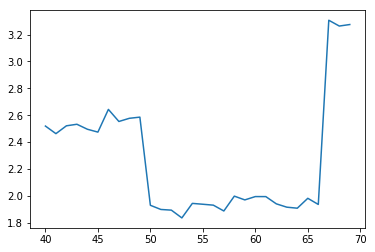

In [140]:
plt.plot([x for x in range(40,70)],loss)

In [141]:
print('Min Loss:', min(loss))
optimalGame = gameAttribs[loss.index(min(loss))]

print('\nOptimal Game:')
print('Crewmate Win Points:', optimalGame[0], '\nImposter Win Points:', optimalGame[1], '\nSecondStage Crewmate Win Points:', optimalGame[2], '\nSecondStage Imposter Win Points:', optimalGame[3])

Min Loss: 1.8359486284508535

Optimal Game:
Crewmate Win Points: 3.65 
Imposter Win Points: 4.15 
SecondStage Crewmate Win Points: 2.65 
SecondStage Imposter Win Points: 4.65
